# data mapping

one of the main features of yabplot is flexible data mapping. you can pass data as:
1. **dictionaries** (for partial data or specific regions).
2. **arrays/lists** (for mapping entire atlas vectors).

this tutorial demonstrates how to visualize statistical maps and roi analysis results.

In [ ]:
import yabplot as yab
import numpy as np
import pandas as pd

## 1. mapping dictionaries (partial data)
this is the safest way to plot data. you only need to provide values for the regions you care about. regions not in the dictionary will be hidden (colored with `nan_color`).

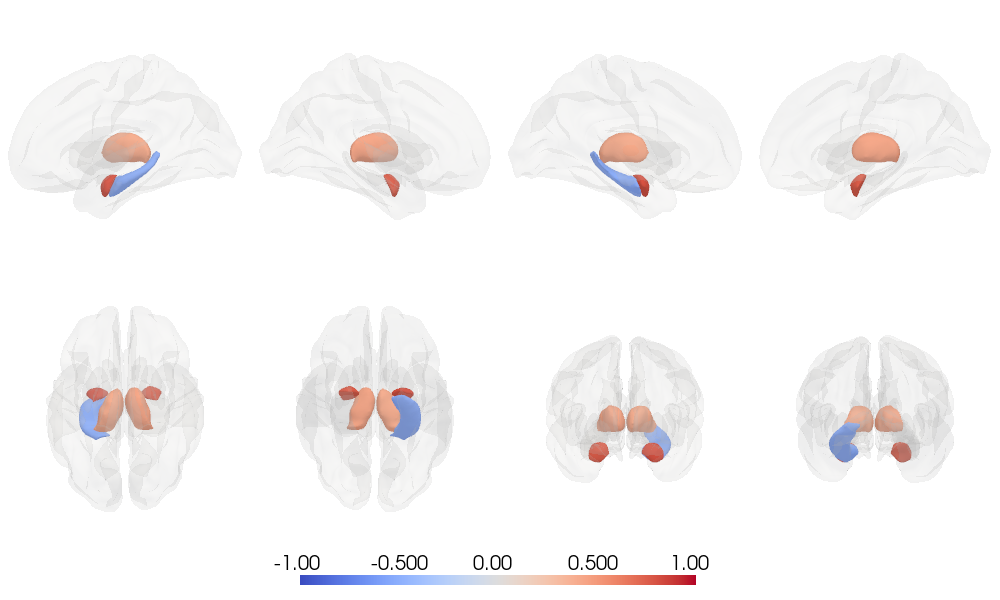

In [6]:
# define some specific values for subcortical regions
# notice how we can mix left and right hemisphere regions
roi_data = {
    'Left_Amygdala': 0.8,
    'Right_Amygdala': 0.75,
    'Left_Thalamus': 0.4,
    'Right_Thalamus': 0.45,
    'Left_Hippocampus': -0.5
}

yab.plot_subcortical(
    data=roi_data,
    atlas='aseg',
    cmap='coolwarm',
    vminmax=[-1, 1],   # center the colormap at 0
    nan_alpha=0.1,     # make other regions almost invisible
    display_type='static'
)

## 2. mapping arrays (full atlas)
if you have a vector of numbers (e.g., from a nilearn analysis or correlation matrix), you can pass it directly.

**important:** when using arrays, the order must match the atlas exactly. use `get_atlas_regions` to verify.

atlas 'schaefer_100' has 100 regions.
first 3: ['7Networks_LH_Vis_1', '7Networks_LH_Vis_2', '7Networks_LH_Vis_3']


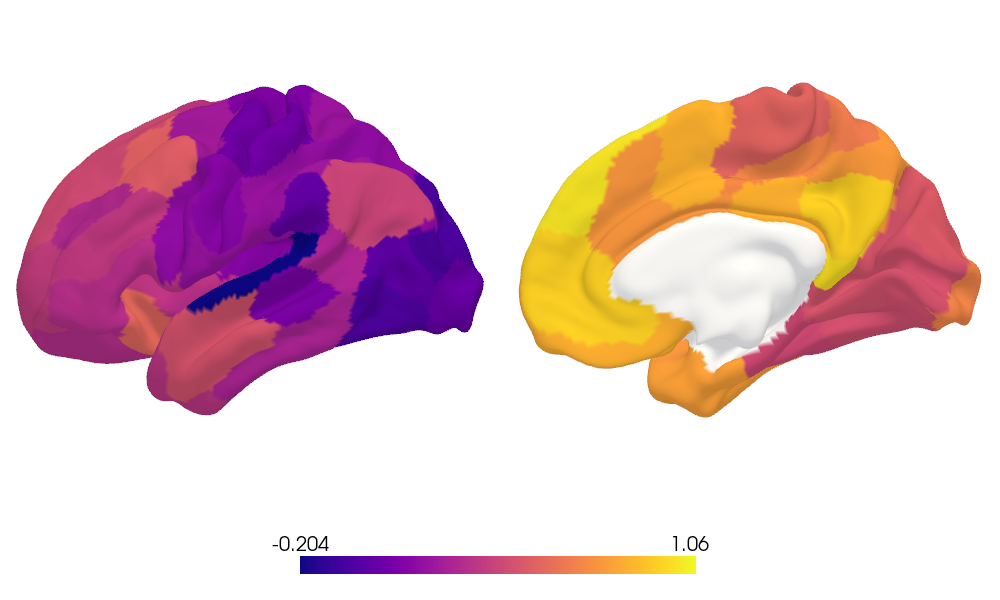

In [7]:
# 1. get the list of regions for the schaefer 100 atlas
atlas_name = 'schaefer_100'
regions = yab.get_atlas_regions(atlas_name, 'cortical')

print(f"atlas '{atlas_name}' has {len(regions)} regions.")
print(f"first 3: {regions[:3]}")

# 2. simulate some "functional connectivity" data
# let's create a gradient from posterior to anterior
data_array = np.linspace(0, 1, len(regions)) 
# add some noise
data_array += np.random.normal(0, 0.1, len(regions))

# 3. plot using the 'plasma' colormap
yab.plot_cortical(
    data=data_array,
    atlas=atlas_name,
    cmap='plasma',
    views=['left_lateral', 'right_medial'],
    display_type='static'
)

## 3. using pandas series
yabplot integrates well with pandas. if you have a dataframe of results, you can pass a series directly if the index matches region names.

       fa_value
AC     0.473477
AF_L   0.430353
AF_R   0.766017
AR_R   0.556351
ATR_L  0.577860


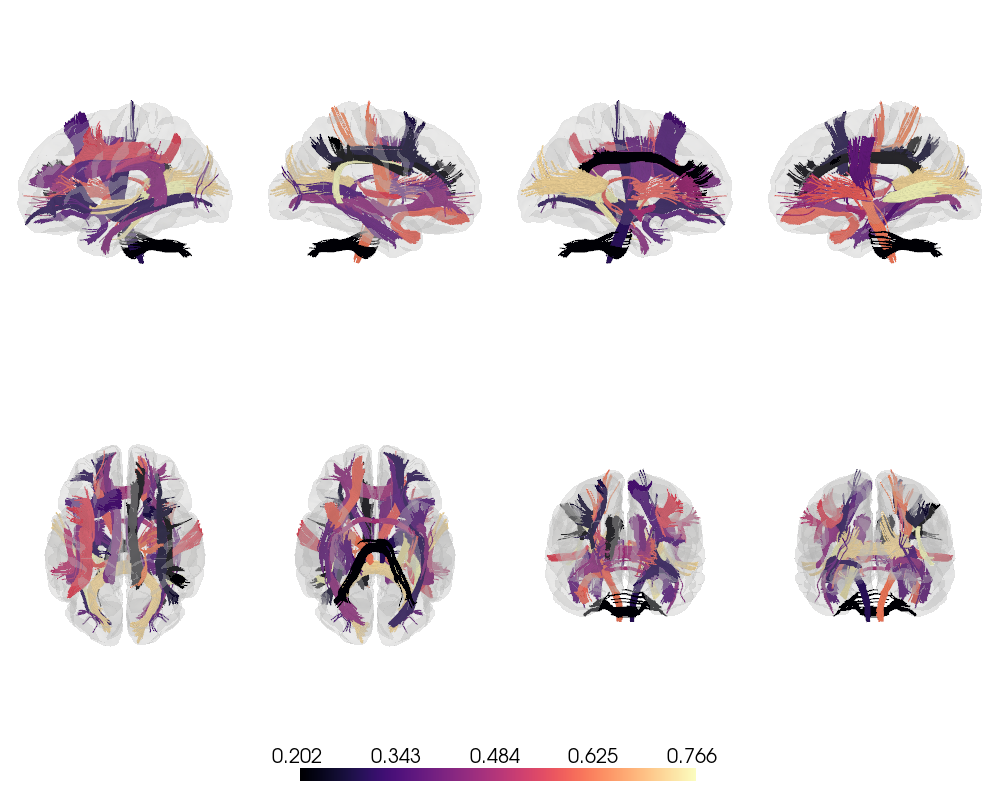

In [9]:
# simulate a dataframe of tract statistics (e.g. fractional anisotropy)
tract_names = yab.get_atlas_regions('xtract_tiny', 'tracts')

# create a pandas series with names as index
df = pd.DataFrame({
    'fa_value': np.random.uniform(0.2, 0.8, len(tract_names))
}, index=tract_names)

print(df.head())

# pass the series directly
yab.plot_tracts(
    data=df['fa_value'],
    atlas='xtract_tiny',
    cmap='magma',
    style='matte',
    bmesh_type='fsaverage',
    display_type='static'
)